In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR

from keras import Sequential
from keras import layers

In [2]:
df = pd.read_csv("data/winequality-red.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Description dataset

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Division dataset

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Models

#### Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")


Valor MSE: 0.38
Valor MAE: 0.47
Valor R2: 0.33


#### Logisitic Regression

In [8]:
model = LogisticRegression(max_iter=1000, solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

Valor MSE: 0.47
Valor MAE: 0.40
Valor R2: 0.19


#### SVR

In [10]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

Valor MSE: 0.47
Valor MAE: 0.52
Valor R2: 0.17


#### RNA

In [32]:
model = Sequential(
    [
        layers.Input(shape=(11,)),
        layers.Dense(22, activation="relu", name="layer1"),
        layers.Dense(22, activation="relu", name="layer2"),
        layers.Dense(1, activation="linear", name="out"),
    ]
)

In [33]:
model.compile(optimizer="adam", loss="mse", metrics=["mse", "mae"])



In [34]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 50.0330 - mae: 6.1729 - mse: 50.0330 - val_loss: 10.7295 - val_mae: 2.8923 - val_mse: 10.7295
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7544 - mae: 2.5419 - mse: 8.7544 - val_loss: 3.7765 - val_mae: 1.5954 - val_mse: 3.7765
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7744 - mae: 1.3590 - mse: 2.7744 - val_loss: 1.9735 - val_mae: 1.1288 - val_mse: 1.9735
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6402 - mae: 1.0278 - mse: 1.6402 - val_loss: 1.5583 - val_mae: 0.9631 - val_mse: 1.5583
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3294 - mae: 0.8982 - mse: 1.3294 - val_loss: 1.3043 - val_mae: 0.8832 - val_mse: 1.3043
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1857 - mae: 0.8517 - mse: 1.1857 - val_loss: 1.1697 - val_mae: 0.8373 - val_mse: 1.1697
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0105 - mae: 0.7871 - mse: 1.0105 - val_lo

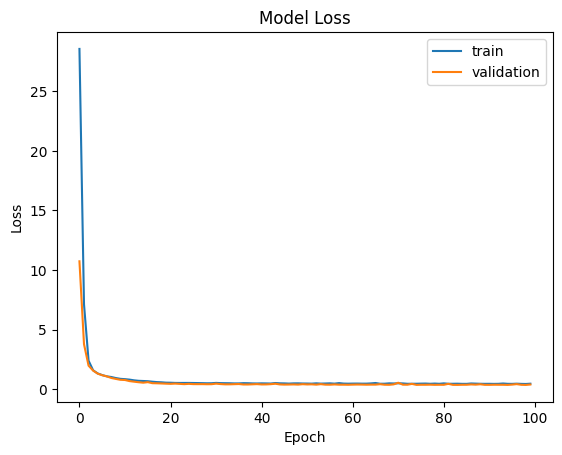

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [36]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Valor MSE: 0.51
Valor MAE: 0.54
Valor R2: 0.11


#### Scaling data

In [37]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Linear Regression

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

Valor MSE: 0.38
Valor MAE: 0.47
Valor R2: 0.33


#### Logistic Regression

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

Valor MSE: 0.47
Valor MAE: 0.40
Valor R2: 0.18


#### SVR

In [40]:
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

Valor MSE: 0.37
Valor MAE: 0.45
Valor R2: 0.35


### RNA

In [41]:
model = Sequential(
    [
        layers.Input(shape=(11,)),
        layers.Dense(22, activation="relu", name="layer1"),
        layers.Dense(22, activation="relu", name="layer2"),
        layers.Dense(1, activation="linear", name="out"),
    ]
)

In [42]:
model.compile(optimizer="adam", loss="mse", metrics=["mse", "mae"])



In [43]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 29.4872 - mae: 5.3680 - mse: 29.4872 - val_loss: 20.6897 - val_mae: 4.4905 - val_mse: 20.6897
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9829 - mae: 4.1528 - mse: 17.9829 - val_loss: 8.0135 - val_mae: 2.7236 - val_mse: 8.0135
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7996 - mae: 2.2161 - mse: 5.7996 - val_loss: 1.0665 - val_mae: 0.8382 - val_mse: 1.0665
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9647 - mae: 0.7928 - mse: 0.9647 - val_loss: 0.9276 - val_mae: 0.7357 - val_mse: 0.9276
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8883 - mae: 0.7600 - mse: 0.8883 - val_loss: 0.8572 - val_mae: 0.7174 - val_mse: 0.8572
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8732 - mae: 0.7499 - mse: 0.8732 - val_loss: 0.8236 - val_mae: 0.7020 - val_mse: 0.8236
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7886 - mae: 0.7136 - mse: 0.7886 - val_

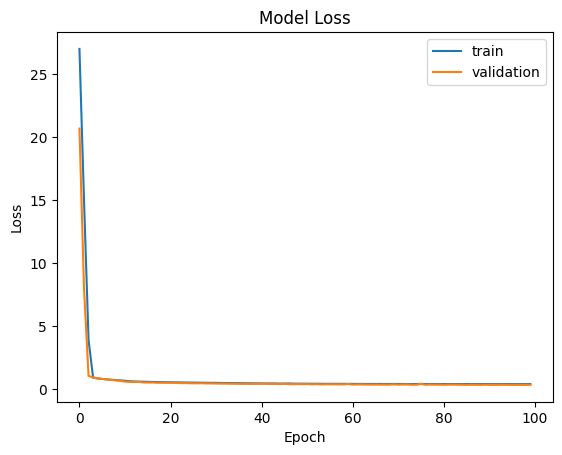

In [44]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [45]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Valor MSE: 0.42
Valor MAE: 0.50
Valor R2: 0.27
